# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Lutfiah Nursabiliyanti
- **Email:** lutfiahn024@gmail.com
- **ID Dicoding:** lutfiahnursabiliyant

## Menentukan Pertanyaan Bisnis

- di musim apa penyewaan sepeda paling tinggi terjadi?
- bagaimana hubungan temperatur terhadap penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

menghubungkan google colab dengan google drive agar dapat mengakses dataset yang sudah disimpan di google drive

memuat tabel 'day.csv' yang berisi data peminjaman sepeda harian pada tahun 2011-2012

In [25]:
day_df = pd.read_csv("day.csv")
#tampilkan 5 baris pertama data pada tabel day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

periksa tipe data dan missing value dari day_df

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tidak ada masalah pada tipe data dan tidak ada missing value pada data day_df

---
periksa duplikasi data


In [27]:
day_df.duplicated()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


periksa parameter statistik data

In [28]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

tidak perlu melakukan cleaning data karena tidak ada masalah pada tipe data, tidak ada missing value, dan tidak ada duplikasi data

## Exploratory Data Analysis (EDA)

### Eksplorasi data day_df

In [29]:
day_df.groupby(by="season"). agg({
    "instant": "nunique",
    "cnt": ["min", "max", "sum"]
})

instant   cnt               
       nunique   min   max      sum
season                             
1          181   431  7836   471348
2          184   795  8362   918589
3          188  1115  8714  1061129
4          178    22  8555   841613

berdasarkan pivot tabel di atas, di ketahui jika jumlah peminjaman sepeda paling tinggi terjadi pada season kategori 3 (fall)

In [30]:
day_df[['temp', 'cnt']].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


dari tabel diatas, diketahui jika korelasi antara temperatur (temp) dengan jumlah peminjaman sepeda (cnt) sebesar 0.627494 yang artinya memiliki hubungan positif

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\lutfi\AppData\Local\Temp\ipykernel_16088\2326682300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


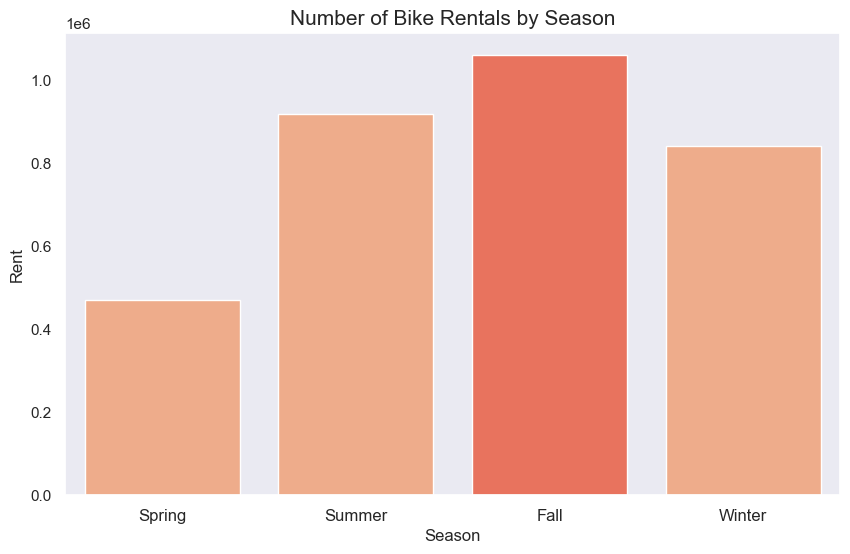

In [31]:
plt.figure(figsize = (10,6))
color_palette = ["#FFA77A", "#FFA77A", "#FF6347", "#FFA77A" ]
sns.barplot(
    y = "cnt",
    x = "season",
    data = day_df.groupby('season')['cnt'].sum().reset_index(),
    palette = color_palette
)

plt.title("Number of Bike Rentals by Season", loc = "center", fontsize = 15)
plt.ylabel("Rent")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

### Pertanyaan 2:

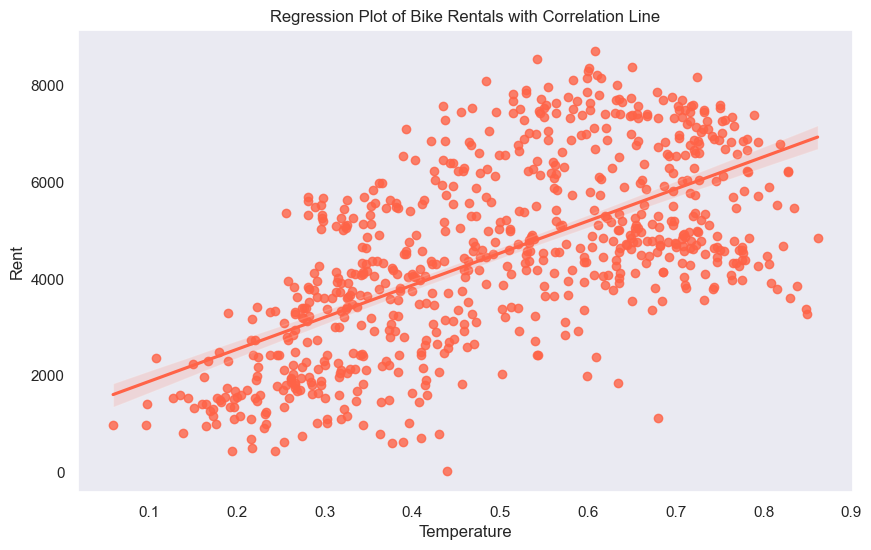

In [32]:
plt.figure(figsize=(10, 6))

sns.regplot(data=day_df, x="temp", y="cnt", color="#FF6347")

plt.title('Regression Plot of Bike Rentals with Correlation Line')
plt.xlabel('Temperature')
plt.ylabel('Rent')
plt.show()

tren garis regresi antara temperatur dan jumlah peminjaman sepeda cenderung naik dari kiri bawah ke kanan atas yang artinya ada hubungan positif antara dua variabel tersebut

## Conclusion

- jumlah peminjaman sepeda secara keseluruhan terjadi pada musim gugur (season dengan kategori 3: fall)
- temperatur (temp) dan jumlah peminjaman sepeda (cnt) memiliki hubungan positif dimana ada kecenderungan semakin tinggi temperatur maka akan semakin tinggi jumlah peminjaman sepeda.